In [9]:
!pip install skforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!pip install -U matplotlib 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,Normalizer,FunctionTransformer,QuantileTransformer,PowerTransformer
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
#from pmdarima.model_selection import RollingForecastCV
#from knn_tspi import KNeighborsTSPI
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster
import statsmodels.api as sm
import matplotlib
#warnings.filterwarnings("ignore")
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_percentage_error

In [12]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
dfc=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Final_general_data.csv')

In [14]:
dfc.drop(['Unnamed: 0'],axis=1,inplace=True)
dfc.head()

,Year,property_id,borough,primary_property_type_self,year_built,occupancy,energy_star_score,natural_gas_use_kbtu,electricity_use_grid_purchase,egrid_output_emissions_rate,green_power_offsite_kwh,largest_property_use_type_gross_floor_area_ft,latitude,longitude
0,2014,1407848,MANHATTAN,Office,1963,100,53.0,8100654.8,211648520.8,82.9,0.0,1733828.0,40.754162,-73.976557
1,2015,1407848,MANHATTAN,Office,1963,85,55.0,7430345.4,173812489.7,82.9,0.0,1733828.0,40.754162,-73.976557
2,2016,1407848,MANHATTAN,Office,1963,85,72.0,7224061.1,137394745.4,92.8,0.0,1733828.0,40.754162,-73.976557
3,2017,1407848,MANHATTAN,Office,1963,85,59.0,7225638.6,159928080.3,88.7,0.0,1733828.0,40.754162,-73.976557
4,2018,1407848,MANHATTAN,Office,1963,85,32.0,7244369.0,161546077.8,84.7,0.0,1733828.0,40.754162,-73.976557


In [15]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3857 entries, 0 to 3856
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           3857 non-null   int64  
 1   property_id                                    3857 non-null   int64  
 2   borough                                        3857 non-null   object 
 3   primary_property_type_self                     3857 non-null   object 
 4   year_built                                     3857 non-null   int64  
 5   occupancy                                      3857 non-null   int64  
 6   energy_star_score                              3738 non-null   float64
 7   natural_gas_use_kbtu                           3496 non-null   float64
 8   electricity_use_grid_purchase                  3773 non-null   float64
 9   egrid_output_emissions_rate                    3851 

In [16]:
dfc['energy_star_score'] = dfc['energy_star_score'].fillna(dfc.groupby('property_id')['energy_star_score'].transform('mean'))

In [17]:
dfc['natural_gas_use_kbtu'] = dfc['natural_gas_use_kbtu'].fillna(dfc.groupby('property_id')['natural_gas_use_kbtu'].transform('mean'))
dfc['electricity_use_grid_purchase'] = dfc['electricity_use_grid_purchase'].fillna(dfc.groupby('property_id')['electricity_use_grid_purchase'].transform('mean'))
dfc['green_power_offsite_kwh'] = dfc['green_power_offsite_kwh'].fillna(dfc.groupby('property_id')['green_power_offsite_kwh'].transform('mean'))
dfc['egrid_output_emissions_rate'] = dfc['egrid_output_emissions_rate'].fillna(dfc.groupby('property_id')['egrid_output_emissions_rate'].transform('mean'))

In [18]:
dfc['Year'] = pd.to_datetime(dfc['Year'],format="%Y")

In [19]:
dfc.head()

,Year,property_id,borough,primary_property_type_self,year_built,occupancy,energy_star_score,natural_gas_use_kbtu,electricity_use_grid_purchase,egrid_output_emissions_rate,green_power_offsite_kwh,largest_property_use_type_gross_floor_area_ft,latitude,longitude
0,2014-01-01,1407848,MANHATTAN,Office,1963,100,53.0,8100654.8,211648520.8,82.9,0.0,1733828.0,40.754162,-73.976557
1,2015-01-01,1407848,MANHATTAN,Office,1963,85,55.0,7430345.4,173812489.7,82.9,0.0,1733828.0,40.754162,-73.976557
2,2016-01-01,1407848,MANHATTAN,Office,1963,85,72.0,7224061.1,137394745.4,92.8,0.0,1733828.0,40.754162,-73.976557
3,2017-01-01,1407848,MANHATTAN,Office,1963,85,59.0,7225638.6,159928080.3,88.7,0.0,1733828.0,40.754162,-73.976557
4,2018-01-01,1407848,MANHATTAN,Office,1963,85,32.0,7244369.0,161546077.8,84.7,0.0,1733828.0,40.754162,-73.976557


In [20]:
data=dfc.sort_values(by='Year')
data.head()

,Year,property_id,borough,primary_property_type_self,year_built,occupancy,energy_star_score,natural_gas_use_kbtu,electricity_use_grid_purchase,egrid_output_emissions_rate,green_power_offsite_kwh,largest_property_use_type_gross_floor_area_ft,latitude,longitude
0,2014-01-01,1407848,MANHATTAN,Office,1963,100,53.0,8100654.8,211648520.8,82.9,0.0,1733828.0,40.754162,-73.976557
891,2014-01-01,2796992,BROOKLYN,Multifamily Housing,1927,100,40.0,2551300.2,1829248.3,82.9,0.0,67080.0,40.692909,-73.993570
897,2014-01-01,2797222,STATEN IS,Office,1925,100,48.0,504558.1,4913903.7,82.9,0.0,61291.0,40.644518,-74.110781
903,2014-01-01,2798104,STATEN IS,Office,2002,100,80.0,1738850.5,3767486.5,82.9,0.0,69609.0,40.610615,-74.184691
909,2014-01-01,2798133,BROOKLYN,Multifamily Housing,1936,100,65.0,4531809.5,586381.5,82.9,0.0,54307.0,40.642530,-73.959588


In [21]:
dfc.shape


(3857, 14)

In [22]:
data = data.set_index('Year')

In [23]:
# creating new dataframe from consumption column
data_new = data.copy()
# inserting new column with yesterday's consumption values
data_new['Previous_year'] = data_new.groupby('property_id')['energy_star_score'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_new.loc[:,'Previous_Diff'] = data_new.groupby('property_id')['Previous_year'].diff()
# dropping NAs
data_new = data_new.dropna()
data_new.head()


,property_id,borough,primary_property_type_self,year_built,occupancy,energy_star_score,natural_gas_use_kbtu,electricity_use_grid_purchase,egrid_output_emissions_rate,green_power_offsite_kwh,largest_property_use_type_gross_floor_area_ft,latitude,longitude,Previous_year,Previous_Diff
Year,,,,,,,,,,,,,,,
2015-01-01,4382931,QUEENS,Office,1917,0,100.0,26132.3,74475.3,82.9,0.0,219178.0,40.751201,-73.934402,100.0,7.333333
2015-01-01,4046313,BRONX,Multifamily Housing,1929,100,89.0,280332.0,313577.2,82.9,0.0,169601.0,40.853719,-73.864847,81.0,33.000000
2015-01-01,3116012,MANHATTAN,Multifamily Housing,1925,100,73.0,249300.0,1660323.6,82.9,0.0,128543.0,40.780819,-73.978830,70.0,0.000000
2015-01-01,1802367,MANHATTAN,Office,1929,100,92.0,9544425.4,19528606.5,82.9,0.0,323600.0,40.724658,-74.007753,91.0,8.000000
2015-01-01,2812272,BRONX,Multifamily Housing,1935,100,29.0,4371544.6,126885.5,82.9,0.0,61542.0,40.846969,-73.908635,77.0,0.000000


In [24]:
data_new.head()

,property_id,borough,primary_property_type_self,year_built,occupancy,energy_star_score,natural_gas_use_kbtu,electricity_use_grid_purchase,egrid_output_emissions_rate,green_power_offsite_kwh,largest_property_use_type_gross_floor_area_ft,latitude,longitude,Previous_year,Previous_Diff
Year,,,,,,,,,,,,,,,
2015-01-01,4382931,QUEENS,Office,1917,0,100.0,26132.3,74475.3,82.9,0.0,219178.0,40.751201,-73.934402,100.0,7.333333
2015-01-01,4046313,BRONX,Multifamily Housing,1929,100,89.0,280332.0,313577.2,82.9,0.0,169601.0,40.853719,-73.864847,81.0,33.000000
2015-01-01,3116012,MANHATTAN,Multifamily Housing,1925,100,73.0,249300.0,1660323.6,82.9,0.0,128543.0,40.780819,-73.978830,70.0,0.000000
2015-01-01,1802367,MANHATTAN,Office,1929,100,92.0,9544425.4,19528606.5,82.9,0.0,323600.0,40.724658,-74.007753,91.0,8.000000
2015-01-01,2812272,BRONX,Multifamily Housing,1935,100,29.0,4371544.6,126885.5,82.9,0.0,61542.0,40.846969,-73.908635,77.0,0.000000


In [25]:
# from google.colab import files

# data_new.to_csv('final_boro_pptype.csv', encoding = 'utf-8-sig')
# files.download('final_boro_pptype.csv')

In [26]:
#Target and Features
X=data_new.drop(['energy_star_score','borough','primary_property_type_self','property_id'], axis=1)
y=data_new['energy_star_score'].values


In [27]:
# #split the dataset into training (70%), validation (10%) and testing (20%) sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.12, random_state=1)
# print("X_train shape: {}".format(X_train.shape))
# print("X_test shape: {}".format(X_test.shape))
# print("y_train shape: {}".format(y_train.shape))
# print("y_test shape: {}".format(y_test.shape))
# print("X_val shape: {}".format(X_val.shape))
# print("y val shape: {}".format(y_val.shape))

In [28]:
data_train = data_new[:1639]
data_val=data_new[1639:1883]
data_test  = data_new[1883:]

#KNN Results

In [ ]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = KNeighborsRegressor(),
                lags      = 1
             )

forecaster.fit(y=data_train['energy_star_score'])
forecaster

/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:522: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:522: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: KNeighborsRegressor() 
Lags: [1] 
Transformer for y: None 
Transformer for exog: None 
Window size: 1 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 1638] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'} 
Creation date: 2022-12-07 18:35:36 
Last fit date: 2022-12-07 18:35:36 
Skforecast version: 0.6.0 
Python version: 3.8.15 

In [ ]:
steps =789
predictions = forecaster.predict(steps=steps)



/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:579: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error
import math
error_mae_test = mean_absolute_error(y_true = data_test['energy_star_score'],y_pred = predictions[244:])
error_mae_val = mean_absolute_error(y_true = data_val['energy_star_score'],y_pred = predictions[:244])
error_rmse_test = mean_squared_error(y_true = data_test['energy_star_score'],y_pred = predictions[244:])
error_rmse_val = mean_squared_error(y_true = data_val['energy_star_score'],y_pred = predictions[:244])
error_mape_test = mean_absolute_percentage_error(y_true = data_test['energy_star_score'],y_pred = predictions[244:])
error_mape_val = mean_absolute_percentage_error(y_true = data_val['energy_star_score'],y_pred = predictions[:244])

print(f"Validation error (rmse): {math.sqrt(error_rmse_val)}")
print(f"Test error (rmse): {math.sqrt(error_rmse_test)}")
print(f"Validation error (mae): {error_mae_val}")
print(f"Test error (mae): {error_mae_test}")
print(f"Validation error (mape): {error_mape_val}")
print(f"Test error (mape): {error_mape_test}")

Validation error (rmse): 36.48541274217698
Test error (rmse): 35.111488989307944
Validation error (mae): 28.832914389799633
Test error (mae): 27.10276548539905
Validation error (mape): 1.3823090409502063
Test error (mape): 1.9004154265430613


In [75]:
val_check=data_val['energy_star_score'].to_frame().reset_index(drop=True)
val_check['Predicted']=predictions[:244].values
test_check=data_test['energy_star_score'].to_frame().reset_index(drop=True)
test_check['Predicted']=predictions[244:].values


AttributeError: ignored

In [ ]:
val_check[:40].plot()
plt.xlabel('Building')
plt.ylabel('Energy Star Score')
plt.title('KNN Predicted Score of Validation Set')

Text(0.5, 1.0, 'KNN Predicted Score of Validation Set')

ImportError: ignored

<Figure size 432x288 with 1 Axes>

Text(0.5, 1.0, 'KNN Predicted Score of Test Set')

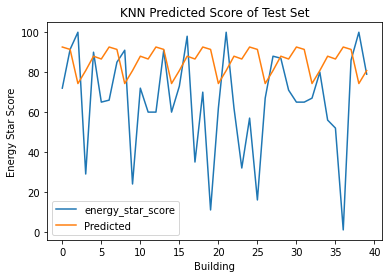

In [ ]:
test_check[:40].plot()
plt.xlabel('Building')
plt.ylabel('Energy Star Score')
plt.title('KNN Predicted Score of Test Set')

In [ ]:
test_check

,energy_star_score,Predicted
0,72.0,92.600000
1,91.4,91.400000
2,100.0,74.311111
3,29.0,80.800000
4,90.0,88.000000
...,...,...
540,78.0,92.600000
541,82.0,91.400000
542,95.0,74.311111
543,45.0,80.800000


#Linear Results

In [ ]:
from copy import deepcopy
forecaster1 = ForecasterAutoreg(
                regressor = LinearRegression(),
                lags      = 1
             )

forecaster1.fit(y=data_train['energy_star_score'])
forecaster1

/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:522: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:522: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: LinearRegression() 
Lags: [1] 
Transformer for y: None 
Transformer for exog: None 
Window size: 1 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 1638] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False} 
Creation date: 2022-12-07 18:38:20 
Last fit date: 2022-12-07 18:38:20 
Skforecast version: 0.6.0 
Python version: 3.8.15 

In [ ]:
predictions1 = forecaster1.predict(steps=steps)


/usr/local/lib/python3.7/dist-packages/skforecast/utils/utils.py:418: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  '`last_window` has DatetimeIndex index but no frequency. '


In [ ]:
error_mae_test1 = mean_absolute_error(y_true = data_test['energy_star_score'],y_pred = predictions1[244:])
error_mae_val1 = mean_absolute_error(y_true = data_val['energy_star_score'],y_pred = predictions1[:244])
error_rmse_test1 = mean_squared_error(y_true = data_test['energy_star_score'],y_pred = predictions1[244:])
error_rmse_val1 = mean_squared_error(y_true = data_val['energy_star_score'],y_pred = predictions1[:244])
error_mape_test1 = mean_absolute_percentage_error(y_true = data_test['energy_star_score'],y_pred = predictions1[244:])
error_mape_val1 = mean_absolute_percentage_error(y_true = data_val['energy_star_score'],y_pred = predictions1[:244])


print(f"Validation error (rmse): {math.sqrt(error_rmse_val1)}")
print(f"Test error (rmse): {math.sqrt(error_rmse_test1)}")
print(f"Validation error (mae): {error_mae_val1}")
print(f"Test error (mae): {error_mae_test1}")
print(f"Validation error (mape): {error_mape_val1}")
print(f"Test error (mape): {error_mape_test1}")

Validation error (rmse): 25.2722612874016
Test error (rmse): 25.55260468678768
Validation error (mae): 21.29269782811416
Test error (mae): 21.223661632242287
Validation error (mape): 0.9169913347589725
Test error (mape): 1.306769458112557


In [ ]:
val_check1=data_val['energy_star_score'].to_frame().reset_index(drop=True)
val_check1['Predicted']=predictions1[:244].values
test_check1=data_test['energy_star_score'].to_frame().reset_index(drop=True)
test_check1['Predicted']= predictions1[244:].values


Text(0.5, 1.0, 'Linear Reg Predicted Score of Validation Set')

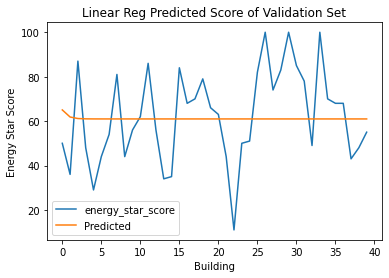

In [ ]:
val_check1[:40].plot()
plt.xlabel('Building')
plt.ylabel('Energy Star Score')
plt.title('Linear Reg Predicted Score of Validation Set')

Text(0.5, 1.0, 'Linear Reg Predicted Score of Test Set')

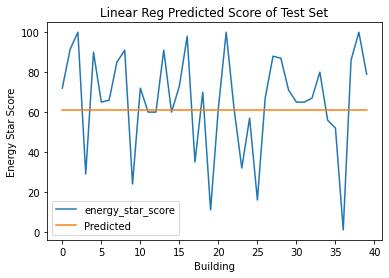

In [ ]:
test_check1[:40].plot()
plt.xlabel('Building')
plt.ylabel('Energy Star Score')
plt.title('Linear Reg Predicted Score of Test Set')

#Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from copy import deepcopy
forecaster2 = ForecasterAutoreg(
                regressor = DecisionTreeRegressor(),
                lags      = 1
             )

forecaster2.fit(y=data_train['energy_star_score'])
forecaster2

/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:522: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:522: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: DecisionTreeRegressor() 
Lags: [1] 
Transformer for y: None 
Transformer for exog: None 
Window size: 1 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 1638] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'} 
Creation date: 2022-12-07 18:38:24 
Last fit date: 2022-12-07 18:38:24 
Skforecast version: 0.6.0 
Python version: 3.8.15 

In [ ]:
predictions2 = forecaster2.predict(steps=steps)

/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:579: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [ ]:
error_mae_test2 = mean_absolute_error(y_true = data_test['energy_star_score'],y_pred = predictions2[244:])
error_mae_val2= mean_absolute_error(y_true = data_val['energy_star_score'],y_pred = predictions2[:244])
error_rmse_test2 = mean_squared_error(y_true = data_test['energy_star_score'],y_pred = predictions2[244:])
error_rmse_val2 = mean_squared_error(y_true = data_val['energy_star_score'],y_pred = predictions2[:244])
error_mape_test2 = mean_absolute_percentage_error(y_true = data_test['energy_star_score'],y_pred = predictions2[244:])
error_mape_val2 = mean_absolute_percentage_error(y_true = data_val['energy_star_score'],y_pred = predictions2[:244])


print(f"Validation error (rmse): {math.sqrt(error_rmse_val2)}")
print(f"Test error (rmse): {math.sqrt(error_rmse_test2)}")
print(f"Validation error (mae): {error_mae_val2}")
print(f"Test error (mae): {error_mae_test2}")
print(f"Validation error (mape): {error_mape_val2}")
print(f"Test error (mape): {error_mape_test2}")

Validation error (rmse): 29.0448956825851
Test error (rmse): 31.5620805011112
Validation error (mae): 24.276955905312946
Test error (mae): 26.483013774317065
Validation error (mape): 0.7240622012705358
Test error (mape): 1.1386589952265878


In [ ]:
val_check2=data_val['energy_star_score'].to_frame().reset_index(drop=True)
val_check2['Predicted']=predictions2[:244].values
test_check2=data_test['energy_star_score'].to_frame().reset_index(drop=True)
test_check2['Predicted']= predictions2[244:].values


Text(0.5, 1.0, 'Decision Trees Predicted Score of Validation Set')

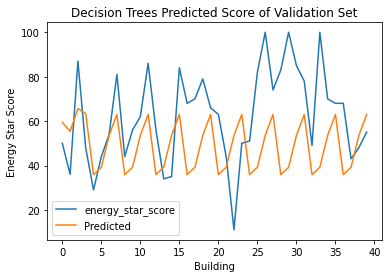

In [ ]:
val_check2[:40].plot()
plt.xlabel('Building')
plt.ylabel('Energy Star Score')
plt.title('Decision Trees Predicted Score of Validation Set')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(test_check2[:100]))), y=test_check2['Predicted'][:100], 
                    mode='lines+markers',
                    name='Predictions'))
fig.add_trace(go.Scatter(x=list(range(len(test_check2[:100]))), y=test_check2['energy_star_score'][:100],
                    mode='lines+markers',
                    name='Actual'))
fig.update_layout(title="Predicted Energy Star Score Decision-Test")
fig.show()

Text(0.5, 1.0, 'Decision Trees Predicted Score of Test Set')

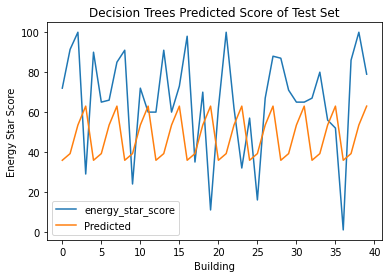

In [ ]:
test_check2[:40].plot()
plt.xlabel('Building')
plt.ylabel('Energy Star Score')
plt.title('Decision Trees Predicted Score of Test Set')

#LSTM Results

In [36]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding, Masking
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard


In [37]:
data_new1=data_new[['energy_star_score','year_built', 'occupancy', 'natural_gas_use_kbtu',
       'electricity_use_grid_purchase', 'egrid_output_emissions_rate',
       'green_power_offsite_kwh',
       'largest_property_use_type_gross_floor_area_ft', 'latitude',
       'longitude', 'Previous_year', 'Previous_Diff']]



In [38]:
data_new1.shape

(2428, 12)

In [39]:
check=data_new1.drop_duplicates()

In [40]:
data_new2=data_new1.reset_index()
data_new2['Year']=data_new2['Year'].dt.year


In [41]:
data_new2=data_new2[['energy_star_score','Year','year_built', 'occupancy', 'natural_gas_use_kbtu',
       'electricity_use_grid_purchase', 'egrid_output_emissions_rate',
       'green_power_offsite_kwh',
       'largest_property_use_type_gross_floor_area_ft', 'latitude',
       'longitude', 'Previous_year', 'Previous_Diff']]

In [42]:
data_new2.shape

(2428, 13)

In [43]:
# from google.colab import files

# data_new2.to_csv('final_boro_pptype.csv', encoding = 'utf-8-sig')
# files.download('final_boro_pptype.csv')

In [44]:
data_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   energy_star_score                              2428 non-null   float64
 1   Year                                           2428 non-null   int64  
 2   year_built                                     2428 non-null   int64  
 3   occupancy                                      2428 non-null   int64  
 4   natural_gas_use_kbtu                           2428 non-null   float64
 5   electricity_use_grid_purchase                  2428 non-null   float64
 6   egrid_output_emissions_rate                    2428 non-null   float64
 7   green_power_offsite_kwh                        2428 non-null   float64
 8   largest_property_use_type_gross_floor_area_ft  2428 non-null   float64
 9   latitude                                       2428 

In [45]:
train_dates=data_new2['Year']

In [46]:
def df_to_X_y2(df, window_size=3):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [47]:
import plotly.express as px
import plotly.graph_objects as go

In [48]:
import collections
def plot_predictions1(model, X, y,title, start=0, end=100):
  predictions = model.predict(X).flatten()
  a_list = collections.deque(predictions)
  a_list.rotate(-1)
  shifted_list = list(a_list)
  df = pd.DataFrame(data={'Predictions':shifted_list[ : -1], 'Actuals':y[ : -1]})
  # plt.figure(figsize=(12, 8))
  # plt.plot(df['Predictions'][start:end],label='Predicted')
  # plt.plot(df['Actuals'][start:end],label='Actual')
  # plt.xlabel(title+ ' Buildings')
  # plt.ylabel('Energy Star Score')
  # plt.title("Predicted Energy Star Score "+ title)
  # plt.legend()
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=list(range(len(df['Predictions'][start:end]))), y=df['Predictions'][start:end],
                      mode='lines+markers',
                      name='Predictions'))
  fig.add_trace(go.Scatter(x=list(range(len(df['Actuals'][start:end]))), y=df['Actuals'][start:end],
                      mode='lines+markers',
                      name='Actual'))
  fig.update_layout(
    title="Predicted Energy Star Score "+ title,
    
    
    
    )
  fig.show()
  print(mean_absolute_error(y, shifted_list), math.sqrt(mean_squared_error(y, shifted_list)), mean_absolute_percentage_error(y, shifted_list))

In [49]:
WINDOW_SIZE=3
X2, y2 = df_to_X_y2(data_new2, WINDOW_SIZE)
X2.shape, y2.shape

((2425, 3, 13), (2425,))

In [50]:
X_train=X2[:1639]
X_val=X2[1639:1883] 
X_test=X2[1883:]
y_train =y2[:1639]
y_val=y2[1639:1883]
y_test=y2[1883:]

In [51]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1639, 3, 13), (1639,), (244, 3, 13), (244,), (542, 3, 13), (542,))

In [52]:
temp_training_mean = [np.mean(X_train[:, :, i]) for i in range(len(data_new2.columns))]
temp_training_std = [np.std(X_train[:, :, i]) for i in range(len(data_new2.columns))]
                           
def preprocess(X):
  for i in range(len(data_new2.columns)):
    X[:, :, i] = (X[:, :, i] - temp_training_mean[i]) / temp_training_std[i]
 

In [53]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

In [54]:
model3 = Sequential()
model3.add(InputLayer((3, 13)))
model3.add(LSTM(32,return_sequences=True))
model3.add(LSTM(32,return_sequences=True))
model3.add(LSTM(32))
model3.add(Dense(128, 'relu'))
model3.add(Dense(1, 'relu'))
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 32)             5888      
                                                                 
 lstm_1 (LSTM)               (None, 3, 32)             8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 26,881
Trainable params: 26,881
Non-trainable params: 0
_________________________________________________________________


In [55]:
model3 = Sequential()
model3.add(InputLayer((3, 13)))
#model3.add(LSTM(100,activation='relu',return_sequences=True))
# model3.add(LSTM(512,activation='relu',return_sequences=True))
# model3.add(LSTM(256,activation='relu',return_sequences=True))
model3.add(LSTM(100))
model3.add(Dense(1, 'linear'))


In [56]:
model8 = Sequential()
model8.add(InputLayer((3, 13)))
#model8.add(LSTM(64,return_sequences=True))
# model8.add(LSTM(512,activation='relu',return_sequences=True))
# model8.add(LSTM(256,activation='relu',return_sequences=True))
#model8.add(LSTM(64,activation='relu',return_sequences=True))
model8.add(LSTM(32,activation='relu'))
#model8.add(LSTM(64,activation='relu'))
#model8.add(Dense(256, kernel_initializer='normal',activation='relu'))
#model8.add(Dense(256, kernel_initializer='normal',activation='relu'))
#model8.add(Dense(256, kernel_initializer='normal',activation='relu'))
model8.add(Dense(256, kernel_initializer='normal',activation='relu'))
model8.add(Dense(1, kernel_initializer='normal',activation='linear'))
#model8.add(Dropout(.1))

In [57]:
# %%time
# es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
# rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
# mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

# tb = TensorBoard('logs')

#history = model2.fit(X_train, y_train, shuffle=True, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)

In [58]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model3.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.01), metrics=['mae'])

In [59]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50,  shuffle=True)#, callbacks=[es, rlr, mcp, tb],

Epoch 1/50
52/52 [==============================] - 3s 18ms/step - loss: 39.0034 - mae: 39.0034 - val_loss: 21.7786 - val_mae: 21.7786
Epoch 2/50
52/52 [==============================] - 0s 6ms/step - loss: 24.5958 - mae: 24.5958 - val_loss: 21.0156 - val_mae: 21.0156
Epoch 3/50
52/52 [==============================] - 0s 6ms/step - loss: 24.3588 - mae: 24.3588 - val_loss: 21.6153 - val_mae: 21.6153
Epoch 4/50
52/52 [==============================] - 0s 6ms/step - loss: 23.5745 - mae: 23.5745 - val_loss: 21.2724 - val_mae: 21.2724
Epoch 5/50
52/52 [==============================] - 0s 6ms/step - loss: 22.9773 - mae: 22.9773 - val_loss: 21.7323 - val_mae: 21.7323
Epoch 6/50
52/52 [==============================] - 0s 7ms/step - loss: 22.4750 - mae: 22.4750 - val_loss: 21.4320 - val_mae: 21.4320
Epoch 7/50
52/52 [==============================] - 0s 6ms/step - loss: 22.2392 - mae: 22.2392 - val_loss: 21.7540 - val_mae: 21.7540
Epoch 8/50
52/52 [==============================] - 0s 6ms/st

In [ ]:
!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 3.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
skforecast 0.5.1 requires matplotlib<=3.5,>=3.3, but you have matplotlib 3.1.1 which is incompatible.


Text(0, 0.5, 'Loss per Epoch')

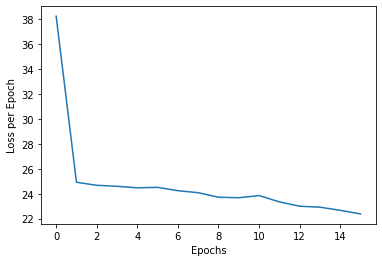

In [ ]:
loss_per_epoch=model3.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
plt.xlabel('Epochs')
plt.ylabel('Loss per Epoch')

In [ ]:
import math

In [ ]:
plot_predictions1(model3,X_train,y_train, "Base Model")

52/52 [==============================] - 1s 2ms/step


26.19377458996299 34.981337280085654 1.7841810978832515


In [ ]:
import math
plot_predictions1(model3,X_val,y_val, "Base Model")

8/8 [==============================] - 0s 4ms/step


22.933363069906047 29.203506051984643 0.905750715524913


In [73]:
predictions = model3.predict(X_test).flatten()
a_list = collections.deque(predictions)
a_list.rotate(-1)
shifted_list = list(a_list)
df = pd.DataFrame(data={'Predictions':shifted_list[ : -1], 'Actuals':y_test[ : -1]})
# plt.figure(figsize=(12, 8))
# plt.plot(df['Predictions'][start:end],label='Predicted')
# plt.plot(df['Actuals'][start:end],label='Actual')
# plt.xlabel(title+ ' Buildings')
# plt.ylabel('Energy Star Score')
# plt.title("Predicted Energy Star Score "+ title)


17/17 [==============================] - 1s 3ms/step


In [ ]:
plot_predictions1(model3,X_test,y_test, "Base Model LSTM")#100,128,1

17/17 [==============================] - 0s 6ms/step


25.617855487633317 31.501479546546907 1.286400925887828


8/8 [==============================] - 1s 10ms/step
26.578543631409474 32.36859571191132 0.9567702508940897


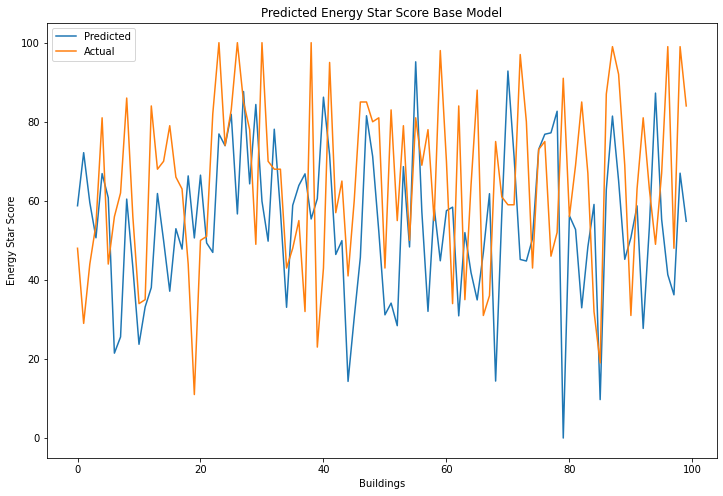

In [ ]:
plot_predictions1(model3,X_val,y_val)#128,256,1, .1

17/17 [==============================] - 0s 9ms/step
26.433090692187136 32.51894773377148 1.2823237130791172


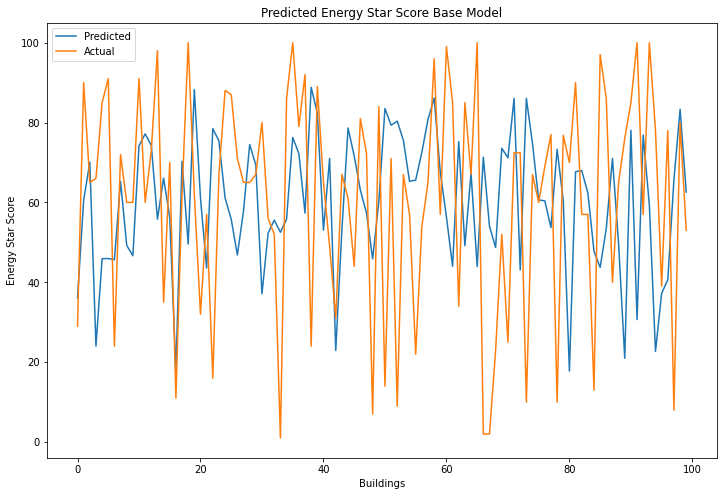

In [ ]:
plot_predictions1(model3,X_test,y_test)

In [ ]:
model4 = Sequential()
model4.add(InputLayer((3, 13)))
model4.add(LSTM(100,return_sequences=True))
model4.add(LSTM(128))
model4.add(Dense(1, 'linear'))
model4.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 3, 100)            45600     
                                                                 
 lstm_32 (LSTM)              (None, 128)               117248    
                                                                 
 dense_16 (Dense)            (None, 1)                 129       
                                                                 
Total params: 162,977
Trainable params: 162,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.001), metrics=['mae'])

In [ ]:
model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[es, rlr, mcp, tb])#,  shuffle=True

Epoch 1/50
50/52 [===========================>..] - ETA: 0s - loss: 55.2082 - mae: 55.2082
Epoch 1: val_loss did not improve from 21.05051
52/52 [==============================] - 7s 45ms/step - loss: 54.9858 - mae: 54.9858 - val_loss: 43.0327 - val_mae: 43.0327 - lr: 0.0010
Epoch 2/50
50/52 [===========================>..] - ETA: 0s - loss: 41.2230 - mae: 41.2230
Epoch 2: val_loss did not improve from 21.05051
52/52 [==============================] - 1s 23ms/step - loss: 41.0834 - mae: 41.0834 - val_loss: 35.3064 - val_mae: 35.3064 - lr: 0.0010
Epoch 3/50
50/52 [===========================>..] - ETA: 0s - loss: 35.8574 - mae: 35.8574
Epoch 3: val_loss did not improve from 21.05051
52/52 [==============================] - 1s 28ms/step - loss: 35.7289 - mae: 35.7289 - val_loss: 30.3125 - val_mae: 30.3125 - lr: 0.0010
Epoch 4/50
51/52 [============================>.] - ETA: 0s - loss: 31.8971 - mae: 31.8971
Epoch 4: val_loss did not improve from 21.05051
52/52 [==========================

Text(0, 0.5, 'Loss per Epoch')

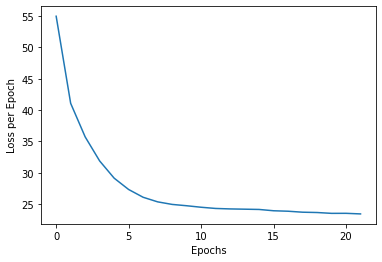

In [ ]:
loss_per_epoch=model4.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
plt.xlabel('Epochs')
plt.ylabel('Loss per Epoch')

8/8 [==============================] - 1s 7ms/step
22.026980391921025 26.43839029877587 0.9105693900637745


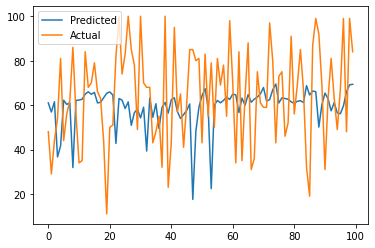

In [ ]:
plot_predictions1(model4,X_val,y_val)

17/17 [==============================] - 0s 8ms/step
24.15482785439487 29.886450522337352 1.3238324044882714


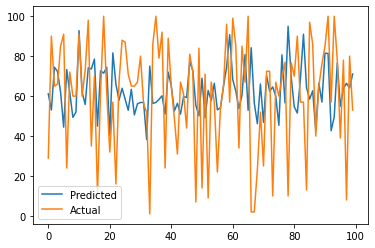

In [ ]:
plot_predictions1(model4,X_test,y_test)

In [ ]:
datelist_train = list(data_new2['Year'])
n_future = 4   # Number of days we want top predict into the future
n_past = 5 

In [ ]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

'''
Remeber, we have datelist_train from begining.
'''

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [ ]:
predictions_future = model2.predict(X_train[-n_future:])

predictions_train = model2.predict(X_train[n_past:])

NameError: ignored

In [ ]:
train_predictions = model3.predict(X_val).flatten()
#train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
# plt.plot(train_results['Train Predictions'][0:500],label='Predicted')
# plt.plot(train_results['Actuals'][0:500],label='Actual')
# plt.legend()

8/8 [==============================] - 0s 3ms/step


In [ ]:
train_predictions.shape, y_val.shape

((732,), (244,))

In [ ]:
val_predictions = model2.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})


NameError: ignored

In [ ]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})


#Prophet Results

In [60]:
data_new2=data_new1.copy()
data_new2=data_new2.reset_index()
data_new2.head()

,Year,energy_star_score,year_built,occupancy,natural_gas_use_kbtu,electricity_use_grid_purchase,egrid_output_emissions_rate,green_power_offsite_kwh,largest_property_use_type_gross_floor_area_ft,latitude,longitude,Previous_year,Previous_Diff
0,2015-01-01,100.0,1917,0,26132.3,74475.3,82.9,0.0,219178.0,40.751201,-73.934402,100.0,7.333333
1,2015-01-01,89.0,1929,100,280332.0,313577.2,82.9,0.0,169601.0,40.853719,-73.864847,81.0,33.000000
2,2015-01-01,73.0,1925,100,249300.0,1660323.6,82.9,0.0,128543.0,40.780819,-73.978830,70.0,0.000000
3,2015-01-01,92.0,1929,100,9544425.4,19528606.5,82.9,0.0,323600.0,40.724658,-74.007753,91.0,8.000000
4,2015-01-01,29.0,1935,100,4371544.6,126885.5,82.9,0.0,61542.0,40.846969,-73.908635,77.0,0.000000


In [61]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
from prophet import Prophet

In [63]:
data_new2.rename(columns={'Year':'ds','energy_star_score':'y' }, inplace=True)

In [64]:
train_data=data_new2.iloc[:1639]
validation_data=data_new2.iloc[1639:1883]
test_daata=data_new2.iloc[1883:]


In [65]:
validation_data_1=data_new2.iloc[1639:1883].drop('y', axis=1) 
test_daata_1=data_new2.iloc[1883:].drop('y', axis=1) 
train_data_1=data_new2.iloc[:1639].drop('y', axis=1) 

In [66]:
model = Prophet()
model.add_regressor('year_built')
model.add_regressor('occupancy')
model.add_regressor('natural_gas_use_kbtu')
model.add_regressor('electricity_use_grid_purchase')
model.add_regressor('egrid_output_emissions_rate')
model.add_regressor('green_power_offsite_kwh')
model.add_regressor('largest_property_use_type_gross_floor_area_ft')
model.add_regressor('latitude')
model.add_regressor('longitude')
model.add_regressor('Previous_year')
model.add_regressor('Previous_Diff')
model.fit(train_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgr_tjc0f/skttc212.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgr_tjc0f/pzfq10am.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6059', 'data', 'file=/tmp/tmpgr_tjc0f/skttc212.json', 'init=/tmp/tmpgr_tjc0f/pzfq10am.json', 'output', 'file=/tmp/tmpgr_tjc0f/prophet_modell80en3a2/prophet_model-20221208155319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:53:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:53:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
15:53:19 - cmdstanpy - ERROR - Chain [1] e

In [67]:
prediction = model.predict(validation_data_1)
y_actual = validation_data['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)
mean_absolute_error(y_actual, y_predicted)

27.042531876138433

In [ ]:
import math

In [70]:
prediction = model.predict(test_daata_1)
y_actual = test_daata['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)

In [69]:
prediction = model.predict(train_data_1)
y_actual = train_data['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)

In [71]:
# from plotly.subplots import make_subplots
# fig = make_subplots(specs=[[{"secondary_y": True}]])
# fig.add_trace(
#     go.Scatter(x=validation_data['ds'], y=y_actual, name="actual targets"),
#     secondary_y=False,)
# fig.add_trace(
#     go.Scatter(x=validation_data['ds'], y=y_predicted, name="predicted targets"),
#     secondary_y=True,)
# fig.update_layout(
#     title_text="Actual vs Predicted Targets")
# fig.update_xaxes(title_text="Timeline")
# fig.update_yaxes(title_text="actual targets", secondary_y=False)
# fig.update_yaxes(title_text="predicted targets", secondary_y=True)
# fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_actual[:100]))), y=y_actual[:100], 
                    mode='lines+markers',
                    name='Predictions'))
fig.add_trace(go.Scatter(x=list(range(len(y_predicted[:100]))), y=y_predicted[:100],
                    mode='lines+markers',
                    name='Actual'))
fig.update_layout(title="Predicted Energy Star Score Prophet-Validation")
fig.show()
print(mean_absolute_error(y_actual, y_predicted), math.sqrt(mean_squared_error(y_actual, y_predicted)), mean_absolute_percentage_error(y_actual, y_predicted))

NameError: ignored

In [81]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_actual[:50]))), y=y_actual[:50],
                    mode='lines+markers',
                    name='Actual'))

fig.add_trace(go.Scatter(x=list(range(len(y_predicted[:50]))), y=y_predicted[:50],
                    mode='lines',
                    name='Prophet Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(df['Predictions'][:50]))), y=df['Predictions'][:50],
                    mode='lines',
                    name='LSTM Predictions'))

fig.update_layout(title="Predicted Energy Star Score General Model", font=dict(
        size=24,
        
    ),xaxis_title="Building",
    yaxis_title="Energy Star Score")
fig.show()

In [80]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_actual[:100]))), y=y_actual[:100],
                    mode='lines+markers',
                    name='Actual'))

fig.add_trace(go.Scatter(x=list(range(len(df['Predictions'][:100]))), y=df['Predictions'][:100],
                    mode='lines',
                    name='LSTM Predictions'))

fig.update_layout(title="Predicted Energy Star Score General Model", font=dict(
        size=24,
        
    ),xaxis_title="Building",
    yaxis_title="Energy Star Score")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_actual[:100]))), y=y_actual[:100], 
                    mode='lines+markers',
                    name='Predictions'))
fig.add_trace(go.Scatter(x=list(range(len(y_predicted[:100]))), y=y_predicted[:100],
                    mode='lines+markers',
                    name='Actual'))
fig.update_layout(title="Predicted Energy Star Score Prophet-Test")
fig.show()


28.271572824848594 35.317735151386906 1.259109055820938


In [ ]:
print(mean_absolute_error(y_actual, y_predicted), math.sqrt(mean_squared_error(y_actual, y_predicted)), mean_absolute_percentage_error(y_actual, y_predicted))

29.730884617422323 37.07511898686001 2.155545364043653


In [ ]:
#General Matrix
import plotly.express as px
md=['KNN','Decision Trees','Linear Regression', 'LSTM','Prophet']
val_mae=[ 28.83,24.27,21.29,21.19,27.04]
val_rmse=[ 36.48,29.04,25.27,25.14,34.16]
test_mae=[27.10,26.48,21.22,24.15,28.27]
test_rmse=[ 35.11,31.56,25.55,29.88,35.31]

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Validation MAE', x=md, y=val_mae,text=val_mae,
            textposition='auto'),
    go.Bar(name='Validation RMSE', x=md, y=val_rmse, text=val_rmse,
            textposition='auto'),
    go.Bar(name='Test MAE', x=md, y=test_mae, text=test_mae,
            textposition='auto'),
    go.Bar(name='Test RMSE', x=md, y=test_rmse, text=test_rmse,
            textposition='auto')
])
# Change the bar mode

fig.update_layout(barmode='group',title_text='General Data Error by Model ',yaxis=dict(
        title='Error'),font=dict(
        size=24,
        
    ))
fig.show()

In [ ]:
#by Borough
md=['BROOKLYN','MANHATTAN','QUEENS','STATEN IS','BRONX']
val_mae=[ 16.55,23.95,22.51,16.78,13.45]
test_mae=[ 21.06,19.23,17.06,17.34,12.23]
val_rmse=[ 22.96,29.68,28.01,24.38,18.02]
test_rmse=[ 27.19,24.40,21.29,25.35,15.66]

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Validation MAE', x=md, y=val_mae,text=val_mae,
            textposition='auto'),
    go.Bar(name='Validation RMSE', x=md, y=val_rmse, text=val_rmse,
            textposition='auto'),
    go.Bar(name='Test MAE', x=md, y=test_mae, text=test_mae,
            textposition='auto'),
    go.Bar(name='Test RMSE', x=md, y=test_rmse, text=test_rmse,
            textposition='auto')
])
# Change the bar mode

fig.update_layout(barmode='group',title_text='Model Error by Borough ',yaxis=dict(
        title='Error'),font=dict(
        size=24,
        
    ))
fig.show()

In [ ]:
#By Property Type
md=[ 'MULTIFAMILY','OFFICE','COLLEGE/DORM']
val_mae=[ 17.96,13.17,16.37]
test_mae=[ 19.79,16.01,16.02]
val_rmse=[ 23.53,18.83,21.67]
test_rmse=[ 24.55,23.60,19.63]

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Validation MAE', x=md, y=val_mae,text=val_mae,
            textposition='auto'),
    go.Bar(name='Validation RMSE', x=md, y=val_rmse, text=val_rmse,
            textposition='auto'),
    go.Bar(name='Test MAE', x=md, y=test_mae, text=test_mae,
            textposition='auto'),
    go.Bar(name='Test RMSE', x=md, y=test_rmse, text=test_rmse,
            textposition='auto')
])
# Change the bar mode

fig.update_layout(barmode='group',title_text='Model Error by Property Type ',yaxis=dict(
        title='Error'),font=dict(
        size=24,
        
    ))
fig.show()